In [4]:
from sklearn.datasets import make_classification

In [5]:
X, Y = make_classification(n_classes=2, n_samples=400, n_clusters_per_class=1, random_state=3, n_features=2, n_informative=2, n_redundant=0)

In [6]:
import matplotlib.pyplot as plt

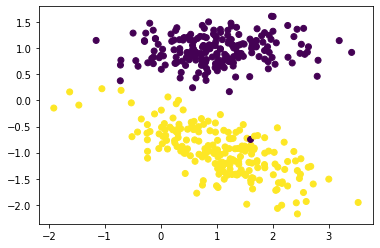

In [7]:
plt.scatter(X[:,0], X[:,1], c=Y)
plt.show()

In [8]:
# convert labels from {1, 0} to {1, -1}
Y[Y==0] = -1 # broadcasting example

In [9]:
# keep a copy of Y original shape
Y_ = Y

In [10]:
# reshape Y to coloumn vector
Y = Y.reshape((-1, 1))

In [11]:
import numpy as np

In [12]:
class SVM:
    def __init__(self, c=1.0):
        ## c is no of outlier (error) i can have
        self.c = c
        self.W = 0
        self.bias = 0
    
    def hingeloss(self, X, Y, W, b):
        """
        params:
        X - (m, n) -> m datapoints, n features/dimension
        Y - (m, 1) label -> m datapoint 
        W - (m, n) weights 
        return:
        loss - numerical digit
        """
        loss = 0.0
        loss += .5 * np.dot(W, W.T)
        
        m = X.shape[0]    
    
        for i in range(m):
            ti = Y[i] * (np.dot(W, X[i].T) + b)
            loss += self.c * max(0, 1-ti)
            
        return loss
    
    def fit(self, X, Y, learning_rate = 0.01, batch_size = 30, max_epochs = 200):
        no_of_samples = X.shape[0]
        no_of_features = X.shape[1]
        
        # initalize the model parameters
        W = np.zeros((no_of_features, 1))
        bias = 0
        
        losses = []
        # update weight and bias
        for i in range(max_epochs):
            
            l = self.hingeloss(X, Y, W, bias)
            losses.append(l)
                
            ## batch gradient descent with random shuffling
            np.random.shuffle(X)
            no_of_batches = int(no_of_samples/batch_size)
            
            ## for batch in range(0, no_of_samples, batch_size):
            for batch_no in range(no_of_batches):
                X_batch = X[batch_no*batch_size: (batch_no+1)*batch_size]
                Y_batch = Y[batch_no*batch_size: (batch_no+1)*batch_size]
                
                t = Y_batch * (np.dot(X_batch, W) + bias)
                print(t.shape)
                
                decision = np.zeros((batch_size, 1))
                decision[t<1] = -1
                
                tXY = np.sum(decision*X_batch*Y_batch, axis=0)
                ## we need to reshape tXY from (2,) to (2, 1) and then take transpose -> finally (1, 2)
                tXY = tXY.reshape((-1, 1))
                
                # delta of loss on w and bias
                gradW = W + self.c * tXY
                gradb = self.c * np.sum(decision * Y_batch)
                
                # updating Weight and bias
                W = W - learning_rate * gradW
                bias = bias - learning_rate * gradb
                
        
        self.W = W
        self.bias = bias
        return W, bias, losses
    
    
    def loss(self, X, Y, W, b):
        t = Y * (np.dot(X, W) + b)
        
        ## np.dot(W.T, W) shape is (1, 1) - to keep loss as scalar do np.sum of np.dot(W.T, W)
        l = .5 * np.sum(np.dot(W.T, W)) + np.sum(np.maximum(0, 1-t))
        
        return l
    
    def fit_transform(self, X, Y, lr = 0.01, batch_size = 40, max_epochs = 20):
        no_of_samples = X.shape[0]
        no_of_features = X.shape[1]
        no_of_batches = int(no_of_samples/batch_size)
        
        # initalize the model parameters
        W = np.zeros((no_of_features, 1))
        bias = 0
        
        losses = []
        batch_losses = []
        
        for i in range(max_epochs):
            
            # shuffle the data - we randomly select the index to use a random batch 
            idx = np.arange(no_of_batches)
            np.random.shuffle(idx)
            
            for j in range(no_of_batches):
                # we got a random batch no i.e., we shuffled the data
                batch_no = idx[j]
                
                X_batch = X[batch_no*batch_size: (batch_no+1)*batch_size]
                Y_batch = Y[batch_no*batch_size: (batch_no+1)*batch_size]
                
                t = Y_batch*(np.dot(X_batch, W) + bias)
                
                # print(t.shape)
                
                decision = np.zeros((batch_size, 1))
                
                decision[t<1] = -1
                # print(decision.shape)

                tXY = np.sum(decision*X_batch*Y_batch, axis=0)
                tXY = tXY.reshape((-1, 1))
                gradW = 0.5 * W + self.c * tXY
                gradb = self.c * np.sum(decision*Y_batch)
                
                W = W - lr * gradW
                bias = bias - lr * gradb
                
                # print(W.shape, bias.shape)
                
                losses.append(self.loss(X, Y, W, bias))
                batch_losses.append(self.loss(X_batch, Y_batch, W, bias))
                
        return W, bias, losses, batch_losses

In [13]:
mySVM = SVM()

In [14]:
W, b, losses, batch_losses = mySVM.fit_transform(X, Y, max_epochs=10)

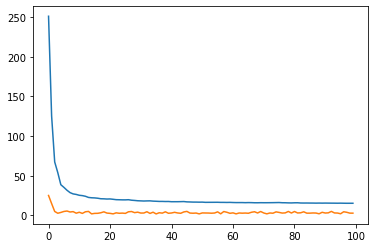

In [15]:
plt.plot(losses)
plt.plot(batch_losses)
plt.show()

In [19]:
def plotHyperplane(w1, w2, b):
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1*x1+b)/w2
    
    plt.plot(x1, x2)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show

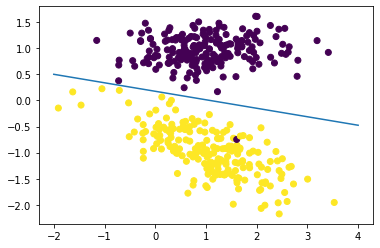

In [21]:
plotHyperplane(W[0,0], W[1,0], b)

In [190]:
np.maximum(0, 1-Y).shape

(400, 1)

### visualize margin hyperplane and support vector

In [27]:
def plotHyperplanes(w1, w2, b):
    x1 = np.linspace(-2, 4, 10)
    x2 = -(w1*x1+b)/w2
    
    xp = -(w1*x1+b+1)/w2
    xn = -(w1*x1+b-1)/w2
    
    plt.figure(figsize=(10,10))
    plt.plot(x1, x2)
    plt.plot(x1, xp)
    plt.plot(x1, xn)
    plt.scatter(X[:,0], X[:,1], c=Y)
    plt.show

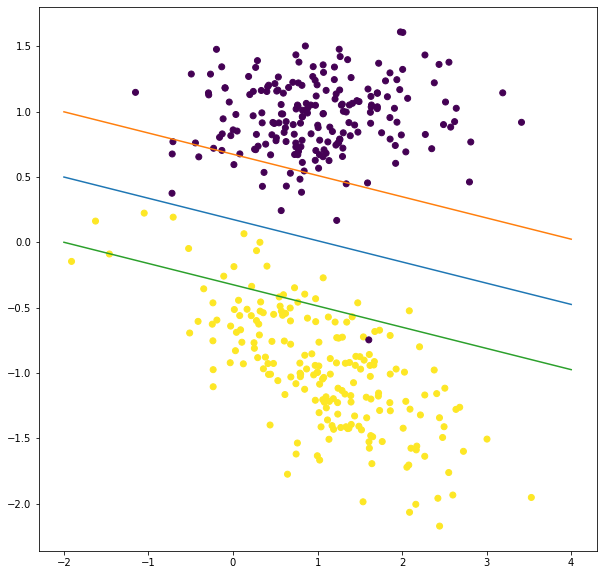

In [28]:
plotHyperplanes(W[0,0], W[1,0], b)